<a href="https://colab.research.google.com/github/JosePabloGFnl/Lab-Vision-Computacional/blob/main/Pr%C3%A1ctica1/practica1_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Imágenes de entrada: 

#importar librerías
import numpy as np
from google.colab.patches import cv2_imshow 
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from PIL import Image, ImageFilter
from google.colab.patches import cv2
from google.colab.patches import cv2_imshow
import cv2
import random
from matplotlib import pyplot as plt

In [ ]:
#cargar imagen
img_path = "cp0-1-a-1.png"
img2_path = "cp0-1-a-2.png"

In [ ]:
#Leer imagen
img_color = cv2.imread(img_path,1)
img_color_b = cv2.imread(img_path,1)
img_color_g = cv2.imread(img_path,1)
img_color_r = cv2.imread(img_path,1)



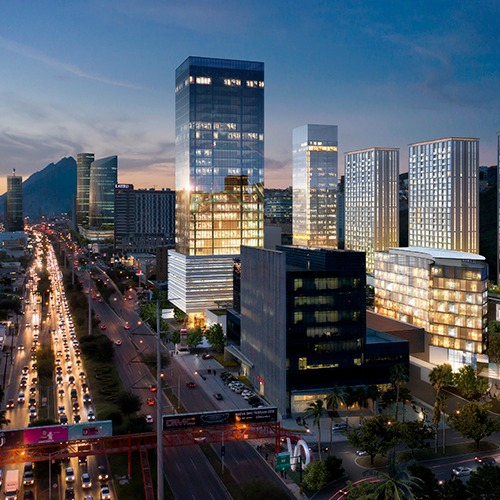

In [ ]:
#2. Planos de color :
cv2_imshow(img_color)

In [ ]:
#obtener parámetros de la imagen
h,w = img_color.shape[:2]

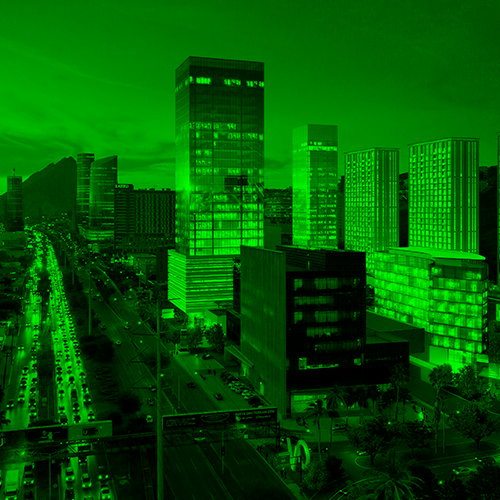

In [ ]:
#Recorrer la matriz
for i in range(0, h):
  for j in range(0,w):
    #Eliminar componentes rojo y azul
    img_color_g[i][j][0] = 0
    img_color_g[i][j][2] = 0
#mostrar imagen en verde
cv2_imshow(img_color_g)
#Guardar imagen monocromática
#cv2.imwrite()

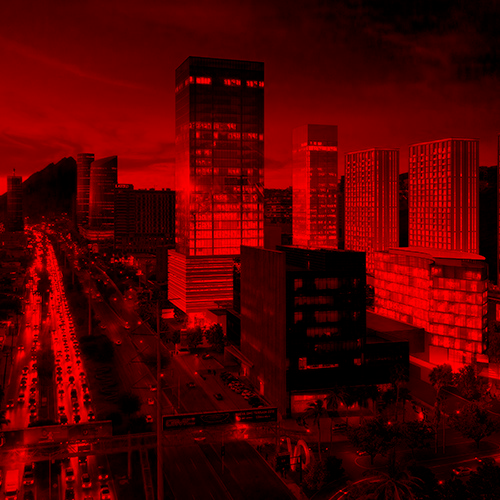

In [ ]:
#Recorrer la matriz
for i in range(0, h):
  for j in range(0,w):
    #Eliminar componentes azul y verde
    img_color_r[i][j][0] = 0
    img_color_r[i][j][1] = 0
#mostrar imagen en rojo
cv2_imshow(img_color_r)
#Guardar imagen monocromática
#cv2.imwrite()


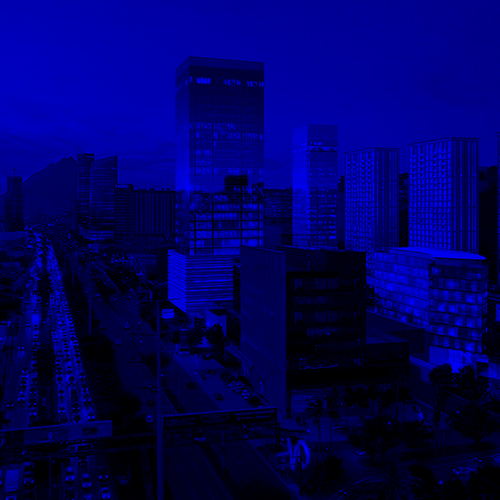

'\n¿Qué se parece más a lo que esperarías que fuera una imagen monocromática? ¿Esperaría que un algoritmo de visión por computadora trabaje en uno mejor que el otro?\nAmbos resultados son lo que esperabamos de una imágen monocromática. En cuánto a la\n'

In [ ]:
#Recorrer la matriz
for i in range(0, h):
  for j in range(0,w):
    #Eliminar componentes azul y verde
    img_color_b[i][j][1] = 0
    img_color_b[i][j][2] = 0
#mostrar imagen en rojo
cv2_imshow(img_color_b)
#Guardar imagen monocromática
#cv2.imwrite()
'''
¿Qué se parece más a lo que esperarías que fuera una imagen monocromática? ¿Esperaría que un algoritmo de visión por computadora trabaje en uno mejor que el otro?
Ambos resultados son lo que esperabamos de una imágen monocromática. En cuánto a la
'''

In [ ]:
#3. Reemplazo de píxeles
from PIL import Image, ImageDraw, ImageFilter

#Tome la región cuadrada central interior de 100x100 píxeles de la versión monocromática de la imagen 1 
#e insértela en el centro de la versión monocromática de la imagen 2  
im1 = Image.open(img_path)
im2 = Image.open(img2_path)
frac = 0.70

left = im1.size[0]*((1-frac)/2)
upper = im1.size[1]*((1-frac)/2)
right = im1.size[0]-((1-frac)/2)*im1.size[0]
bottom = im1.size[1]-((1-frac)/2)*im1.size[1]
im1 = im1.crop((left, upper, right, bottom))

im2.paste(im1, (100, 0))
#Salida: almacene la nueva imagen creada como cp0-3-a-1.png 
im2.save('cp0-3-a-1.png', quality=95)

In [ ]:
#4. Operaciones aritméticas y geométricas
#¿Cuál es el mínimo y el máximo de los valores de píxel de img1_green?
smallest = np.amin(img_color_g)
print(smallest)

biggest = np.amax(img_color_g)
print(biggest)
#¿Cuál es la media?
#¿Cuál es la desviación estándar? 
#¿Y cómo calculaste esto? Salida: respuesta de texto, con fragmentos de código.

0
255


In [ ]:
def sp_noise(image,prob):

    '''
         Agregue ruido de sal y pimienta
         problema: relación de ruido
    '''

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]

    return output

In [ ]:
def gasuss_noise(image, mean=0, var=0.001):

    '''
                 Agregue ruido gaussiano
                 var: varianza
    '''
    
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)

    return out

In [ ]:
#Añadir ruido Gaussiano
img = img_color
img_blue = img_color_b

# Agregue ruido de sal y pimienta, la relación de ruido es 0.02
out1 = sp_noise(img, prob=0.02)

# Agregue ruido gaussiano con un valor medio de 0 y una varianza de 0.01
out2 = gasuss_noise(img, mean=0, var=0.01)


# Mostrar imagen
titles = ['Original Image', 'Add Salt and Pepper noise','Add Gaussian noise']
images = [img, out1, out2]

plt.figure(figsize = (20, 15))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
#Añadir ruido Gaussiano
img_green = img_color_g

# Agregue ruido de sal y pimienta, la relación de ruido es 0.02
out1 = sp_noise(img_green, prob=0.02)

# Agregue ruido gaussiano con un valor medio de 0 y una varianza de 0.01
out2 = gasuss_noise(img_green, mean=0, var=0.01)


# Mostrar imagen
titles = ['Original Image', 'Add Salt and Pepper noise','Add Gaussian noise']
images = [img_green, out1, out2]

plt.figure(figsize = (20, 15))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
#Añadir ruido Gaussiano


# Agregue ruido de sal y pimienta, la relación de ruido es 0.02
out1 = sp_noise(img_color_b, prob=0.02)

# Agregue ruido gaussiano con un valor medio de 0 y una varianza de 0.01
out2 = gasuss_noise(img_color_b, mean=0, var=0.01)


# Mostrar imagen
titles = ['Original Image', 'Add Salt and Pepper noise','Add Gaussian noise']
images = [img_color_b, out1, out2]

plt.figure(figsize = (20, 15))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()